<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Data-description" data-toc-modified-id="Data-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data description</a></span></li><li><span><a href="#Importing-libraries-and-loading-dataset" data-toc-modified-id="Importing-libraries-and-loading-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing libraries and loading dataset</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Model-selection-and-training-original-data" data-toc-modified-id="Model-selection-and-training-original-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model selection and training original data</a></span></li><li><span><a href="#Model-training-(dimensionality-reduction)" data-toc-modified-id="Model-training-(dimensionality-reduction)-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model training (dimensionality reduction)</a></span></li><li><span><a href="#Model-training-Tuned-Random-Forest" data-toc-modified-id="Model-training-Tuned-Random-Forest-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Model training-Tuned Random Forest</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Introduction

Company Introduction
Your client for this project is a Oil company.

They are one of the largest Oil Company. By 2017 they had daily production of 25.451 million BOE(barrels of oil equivalent).
In 2017, this was approximately 13% of world production, which is less than several of the largest state-owned petroleum companies.
They want to increase their production in order to compete with larger oil companies.
They want to automate the process of keeping track of the state and trend of production using previous Crude Oil Data.
Their research and development teams are trying to understand properties of the previous years Crude Oil data so that they can use it to increase their production.

Current Scenario
Determining state of production as growth or decay, based upon historical crude oil data.
The traditional crude oil production state prediction methods are based on statistical analysis, extracting effective information from historical data and making reasonable judgements for classification.
Statistics based models use a sample of data to perform classification, so these can not provide accurate results.
However, designing a computer program to do this turns out to be a bit trickier.

The current process suffers from the following problems:

The current process is a manual classification of production state using statistical methods.
This is very tedious and time-consuming as it needs to be repeated for every new customer.

The company has hired you as a data science consultant.

They want to automate the process of predicting the production state using properties of the crude oil trend rather than doing this manual work.

Your Role
You are given previous year Crude Oil Production data.
Your task is to build a classification model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

Project Deliverables
Deliverable: CrudeOil Production will grow or not.
Machine Learning Task: Classification
Target Variable: Target
Win Condition: N/A (best possible model)

# Data description

In [ ]:
'' '''''
Dataset Feature Description
TThe following acoustic properties of each voice are measured and included in the dataset:

Column Name	Description
Id	Unique Id
month	Selected Months
Country	Countries(76 in Total)
1_diffClosing stocks(kmt)	Closing Stocks for one Month
1_diffExports(kmt)	Exports for one Month
1_diffImports(kmt)	Import for one Month
1_diffRefinery intake	Refinery Intake for one Month
1_diffWTI	West texas Intermediate Price for one Month
1_diffSumClosing stocks(kmt)	Sum Closing Stocks for one Month
1_diffSumExports(kmt)	Sum Exports for one Month
1_diffSumImports(kmt)	Sum Import for one Month
1_diffSumProduction(kmt)	Sum Production one Month
1_diffSumRefinery intake(kmt)	Sum Refinery Intake
Target	The label for the crude oil data (whether production will grow or not)

'''''''

# Importing libraries and loading dataset

In [ ]:
!pip install -q datascience                                           # Package that is required by pandas profiling
!pip install -q pandas-profiling                                      # Library to generate basic statistics about data

     |████████████████████████████████| 69 kB 3.4 MB/s 


In [4]:
!pip install -q --upgrade pandas-profiling                            # To upgrade pandas-profiling

     |████████████████████████████████| 261 kB 5.3 MB/s 
     |████████████████████████████████| 102 kB 9.5 MB/s 
     |████████████████████████████████| 62 kB 726 kB/s 
     |████████████████████████████████| 3.1 MB 35.8 MB/s 
     |████████████████████████████████| 675 kB 57.0 MB/s 
     |████████████████████████████████| 10.1 MB 55.5 MB/s 
     |████████████████████████████████| 636 kB 67.2 MB/s 
     |████████████████████████████████| 812 kB 67.8 MB/s 
     |████████████████████████████████| 28.5 MB 48 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.26.0 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                   # Importing for panel data analysis
from pandas_profiling import ProfileReport                            # Import Pandas Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                            # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                           # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                               # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                        # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)           # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                    # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                       # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                                 # Backend used for rendering and GUI integration
import seaborn as sns                                                 # Importing seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                  # Importing train_test_split to split training and testing set 
from sklearn.preprocessing import StandardScaler                      # Importing standard scaler to perform standardization
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                   # To use Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier                    # To use KNN Classifier
from sklearn.svm import SVC                                           # To use Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier                       # To use Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                   # To use Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier               # To use Gradient Boosting Classifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # To apply LDA
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                       # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                     # Warnings will appear only once

In [3]:
df=pd.read_csv('Oil_train.csv')

# EDA

In [ ]:
df.head()

,ID,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),1_diffSumProduction(kmt),1_diffSumRefinery intake(kmt),2_diffClosing stocks(kmt),2_diffExports(kmt),2_diffImports(kmt),2_diffRefinery intake(kmt),2_diffWTI,2_diffSumClosing stocks(kmt),2_diffSumExports(kmt),2_diffSumImports(kmt),2_diffSumProduction(kmt),2_diffSumRefinery intake(kmt),3_diffClosing stocks(kmt),3_diffExports(kmt),3_diffImports(kmt),3_diffRefinery intake(kmt),3_diffWTI,3_diffSumClosing stocks(kmt),3_diffSumExports(kmt),3_diffSumImports(kmt),3_diffSumProduction(kmt),3_diffSumRefinery intake(kmt),4_diffClosing stocks(kmt),4_diffExports(kmt),4_diffImports(kmt),4_diffRefinery intake(kmt),4_diffWTI,4_diffSumClosing stocks(kmt),4_diffSumExports(kmt),4_diffSumImports(kmt),4_diffSumProduction(kmt),4_diffSumRefinery intake(kmt),5_diffClosing stocks(kmt),5_diffExports(kmt),5_diffImports(kmt),5_diffRefinery intake(kmt),5_diffWTI,5_diffSumClosing stocks(kmt),5_diffSumExports(kmt),5_diffSumImports(kmt),5_diffSumProduction(kmt),5_diffSumRefinery intake(kmt),6_diffClosing stocks(kmt),6_diffExports(kmt),6_diffImports(kmt),6_diffRefinery intake(kmt),6_diffWTI,6_diffSumClosing stocks(kmt),6_diffSumExports(kmt),6_diffSumImports(kmt),6_diffSumProduction(kmt),6_diffSumRefinery intake(kmt),7_diffClosing stocks(kmt),7_diffExports(kmt),7_diffImports(kmt),7_diffRefinery intake(kmt),7_diffWTI,7_diffSumClosing stocks(kmt),7_diffSumExports(kmt),7_diffSumImports(kmt),7_diffSumProduction(kmt),7_diffSumRefinery intake(kmt),8_diffClosing stocks(kmt),8_diffExports(kmt),8_diffImports(kmt),8_diffRefinery intake(kmt),8_diffWTI,8_diffSumClosing stocks(kmt),8_diffSumExports(kmt),8_diffSumImports(kmt),8_diffSumProduction(kmt),8_diffSumRefinery intake(kmt),9_diffClosing stocks(kmt),9_diffExports(kmt),9_diffImports(kmt),9_diffRefinery intake(kmt),9_diffWTI,9_diffSumClosing stocks(kmt),9_diffSumExports(kmt),9_diffSumImports(kmt),9_diffSumProduction(kmt),9_diffSumRefinery intake(kmt),10_diffClosing stocks(kmt),10_diffExports(kmt),10_diffImports(kmt),10_diffRefinery intake(kmt),10_diffWTI,10_diffSumClosing stocks(kmt),10_diffSumExports(kmt),10_diffSumImports(kmt),10_diffSumProduction(kmt),10_diffSumRefinery intake(kmt),11_diffClosing stocks(kmt),11_diffExports(kmt),11_diffImports(kmt),11_diffRefinery intake(kmt),11_diffWTI,11_diffSumClosing stocks(kmt),11_diffSumExports(kmt),11_diffSumImports(kmt),11_diffSumProduction(kmt),11_diffSumRefinery intake(kmt),12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt),Target
0,ID04188,6,46,0.00,0.00,0.00,0.00,2.62,7069.83,-3216.17,3291.57,-9977.56,-5846.32,0.00,0.00,0.00,0.00,-12.07,-2652.68,2165.71,-4491.31,8211.13,5942.25,0.00,0.00,0.00,0.00,1.59,-1421.26,-6194.27,7706.77,-10581.66,2893.44,0.00,0.00,0.00,0.00,3.26,1116.38,2926.93,3217.17,10352.59,8773.11,0.00,0.00,0.00,0.00,-6.92,2100.00,-2666.44,-3956.18,-162.94,468.77,0.00,0.00,0.00,0.00,8.02,-4942.92,762.34,-6657.26,-7457.74,-10467.55,0.00,0.00,0.00,0.00,1.50,4572.19,219.28,-3695.83,10071.98,-5463.10,0.00,0.00,0.00,0.00,2.67,-5302.67,3348.43,3339.96,-8501.10,4832.35,0.00,0.00,0.00,0.00,7.26,-2856.93,8578.29,5797.09,11567.34,11558.16,0.00,0.00,0.00,0.00,-0.39,-1368.62,-7199.75,992.10,1026.50,-37.18,0.00,0.00,0.00,0.00,6.11,-1109.42,-8571.02,-21553.75,-27304.70,-34199.31,0.00,0.00,0.00,0.00,9.09,9341.68,7186.40,22441.05,21649.35,27000.54,0
1,ID02229,8,73,-117.00,0.00,-125.00,6.00,-7.40,-4477.97,-675.97,-3155.11,-6110.69,-3398.20,10.00,0.00,20.00,14.00,0.38,-4169.48,3348.58,5221.94,8194.12,8280.45,-14.00,0.00,-25.00,-85.00,-6.87,-5568.19,1897.21,523.27,2815.56,2466.83,63.00,0.00,-15.00,-88.00,-9.88,410.63,-11801.92,-6149.10,-11505.12,-16479.29,-68.00,0.00,-46.00,84.00,14.26,-347.11,14913.51,1755.1

In [ ]:
df.describe()

,month,country,1_diffClosing stocks(kmt),1_diffExports(kmt),1_diffImports(kmt),1_diffRefinery intake(kmt),1_diffWTI,1_diffSumClosing stocks(kmt),1_diffSumExports(kmt),1_diffSumImports(kmt),1_diffSumProduction(kmt),1_diffSumRefinery intake(kmt),2_diffClosing stocks(kmt),2_diffExports(kmt),2_diffImports(kmt),2_diffRefinery intake(kmt),2_diffWTI,2_diffSumClosing stocks(kmt),2_diffSumExports(kmt),2_diffSumImports(kmt),2_diffSumProduction(kmt),2_diffSumRefinery intake(kmt),3_diffClosing stocks(kmt),3_diffExports(kmt),3_diffImports(kmt),3_diffRefinery intake(kmt),3_diffWTI,3_diffSumClosing stocks(kmt),3_diffSumExports(kmt),3_diffSumImports(kmt),3_diffSumProduction(kmt),3_diffSumRefinery intake(kmt),4_diffClosing stocks(kmt),4_diffExports(kmt),4_diffImports(kmt),4_diffRefinery intake(kmt),4_diffWTI,4_diffSumClosing stocks(kmt),4_diffSumExports(kmt),4_diffSumImports(kmt),4_diffSumProduction(kmt),4_diffSumRefinery intake(kmt),5_diffClosing stocks(kmt),5_diffExports(kmt),5_diffImports(kmt),5_diffRefinery intake(kmt),5_diffWTI,5_diffSumClosing stocks(kmt),5_diffSumExports(kmt),5_diffSumImports(kmt),5_diffSumProduction(kmt),5_diffSumRefinery intake(kmt),6_diffClosing stocks(kmt),6_diffExports(kmt),6_diffImports(kmt),6_diffRefinery intake(kmt),6_diffWTI,6_diffSumClosing stocks(kmt),6_diffSumExports(kmt),6_diffSumImports(kmt),6_diffSumProduction(kmt),6_diffSumRefinery intake(kmt),7_diffClosing stocks(kmt),7_diffExports(kmt),7_diffImports(kmt),7_diffRefinery intake(kmt),7_diffWTI,7_diffSumClosing stocks(kmt),7_diffSumExports(kmt),7_diffSumImports(kmt),7_diffSumProduction(kmt),7_diffSumRefinery intake(kmt),8_diffClosing stocks(kmt),8_diffExports(kmt),8_diffImports(kmt),8_diffRefinery intake(kmt),8_diffWTI,8_diffSumClosing stocks(kmt),8_diffSumExports(kmt),8_diffSumImports(kmt),8_diffSumProduction(kmt),8_diffSumRefinery intake(kmt),9_diffClosing stocks(kmt),9_diffExports(kmt),9_diffImports(kmt),9_diffRefinery intake(kmt),9_diffWTI,9_diffSumClosing stocks(kmt),9_diffSumExports(kmt),9_diffSumImports(kmt),9_diffSumProduction(kmt),9_diffSumRefinery intake(kmt),10_diffClosing stocks(kmt),10_diffExports(kmt),10_diffImports(kmt),10_diffRefinery intake(kmt),10_diffWTI,10_diffSumClosing stocks(kmt),10_diffSumExports(kmt),10_diffSumImports(kmt),10_diffSumProduction(kmt),10_diffSumRefinery intake(kmt),11_diffClosing stocks(kmt),11_diffExports(kmt),11_diffImports(kmt),11_diffRefinery intake(kmt),11_diffWTI,11_diffSumClosing stocks(kmt),11_diffSumExports(kmt),11_diffSumImports(kmt),11_diffSumProduction(kmt),11_diffSumRefinery intake(kmt),12_diffClosing stocks(kmt),12_diffExports(kmt),12_diffImports(kmt),12_diffRefinery intake(kmt),12_diffWTI,12_diffSumClosing stocks(kmt),12_diffSumExports(kmt),12_diffSumImports(kmt),12_diffSumProduction(kmt),12_diffSumRefinery intake(kmt),Target
count,7619.00,7619.00,7421.00,7619.00,7505.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7423.00,7619.00,7508.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7427.00,7619.00,7510.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7429.00,7619.00,7512.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7433.00,7619.00,7514.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7440.00,7619.00,7517.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7440.00,7619.00,7520.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7439.00,7619.00,7524.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7440.00,7619.00,7526.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7442.00,7619.00,7528.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7443.00,7619.00,7527.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7450.00,7619.00,7530.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00,7619.00
mean,6.51,38.67,0.79,-2.62,1.81,7.13,0.60,-6.29,235.44,66.00,337.59,319.52,10.08,5.50,9.77,12.33,0.57,68.57,428.86,245.23,689.40,614.18,-2.01,-0.54,-4.42,10.24,0.51,118.62,246.69,209.75,484.65,463.47,0.30,8.88,

In [ ]:
df.shape

(7619, 124)

In [ ]:
df.info(verbose = True, memory_usage = 'deep', null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7619 entries, 0 to 7618
Data columns (total 124 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              7619 non-null   object 
 1   month                           7619 non-null   int64  
 2   country                         7619 non-null   int64  
 3   1_diffClosing stocks(kmt)       7421 non-null   float64
 4   1_diffExports(kmt)              7619 non-null   float64
 5   1_diffImports(kmt)              7505 non-null   float64
 6   1_diffRefinery intake(kmt)      7619 non-null   float64
 7   1_diffWTI                       7619 non-null   float64
 8   1_diffSumClosing stocks(kmt)    7619 non-null   float64
 9   1_diffSumExports(kmt)           7619 non-null   float64
 10  1_diffSumImports(kmt)           7619 non-null   float64
 11  1_diffSumProduction(kmt)        7619 non-null   float64
 12  1_diffSumRefinery intake(kmt)   7

In [ ]:
print('Contains Redundant Records?:', df.duplicated().any())


Contains Redundant Records?: False


In [ ]:
def duplicate_cols(df):
  ls1 = []
  ls2 = []

  columns = df.columns.values
  for i in range(0, len(columns)):
    for j in range(i+1, len(columns)):
      if (np.where(df[columns[i]] == df[columns[j]], True, False).all() == True):
        ls1.append(columns[i])
        ls2.append(columns[j])

  if ((len(ls1) == 0) & (len(ls2) == 0)):
    return None
  else:
    duplicate_frame = pd.DataFrame()
    duplicate_frame['Feature 1'] = ls1
    duplicate_frame['Feature 2'] = ls2
    return duplicate_frame

In [ ]:
duplicate_cols(df)

In [9]:
df.isnull().sum().sum()

3408

In [15]:
df.country.nunique()

76

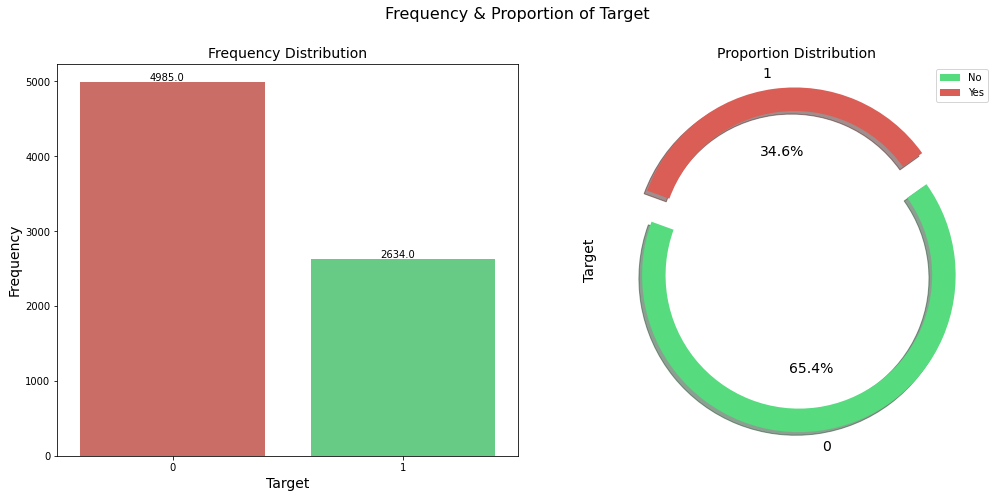

In [ ]:
fig = plt.figure(figsize = [15,10])
plt.subplot(1, 2, 1)
ax = sns.countplot(x = 'Target', data = df, palette = ['#DB5E56','#56DB7F'])
plt.xlabel(xlabel = 'Target', size = 14)
plt.ylabel(ylabel = 'Frequency', size = 14)
plt.title(label = 'Frequency Distribution', size = 14)
for p in ax.patches:
        ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+20))
plt.subplot(1, 2, 2)
space = np.ones(2)/10
df['Target'].value_counts().plot(kind = 'pie', explode = space,fontsize = 14, autopct = '%3.1f%%', wedgeprops = dict(width=0.15), 
                                       shadow = True, startangle = 160, figsize = [15, 7], legend = True, colors = ['#56DB7F','#DB5E56'])
plt.legend(['No', 'Yes'])
plt.ylabel(ylabel = 'Target', size = 14)
plt.title(label = 'Proportion Distribution', size = 14)
plt.tight_layout(pad = 3.0)
plt.suptitle(t = 'Frequency & Proportion of Target', y = 1.02, size = 16)
plt.show()

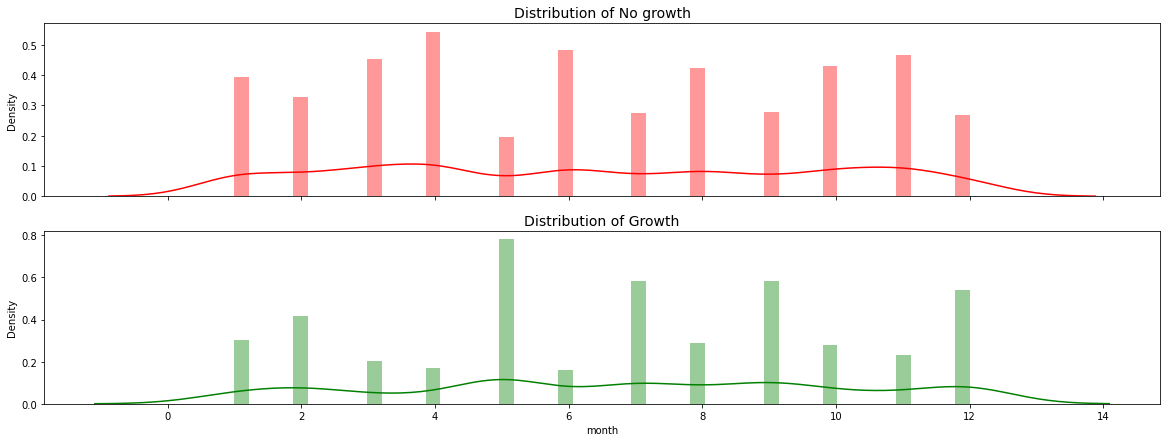

In [ ]:
# Slicing data with No-Attrition
Target_No = df['month'][df['Target'] == 0]

# Slicing data with Yes-Attrition
Target_Yes = df['month'][df['Target'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Target_No, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of No growth' , size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Target_Yes, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of Growth', size = 14)
plt.show()

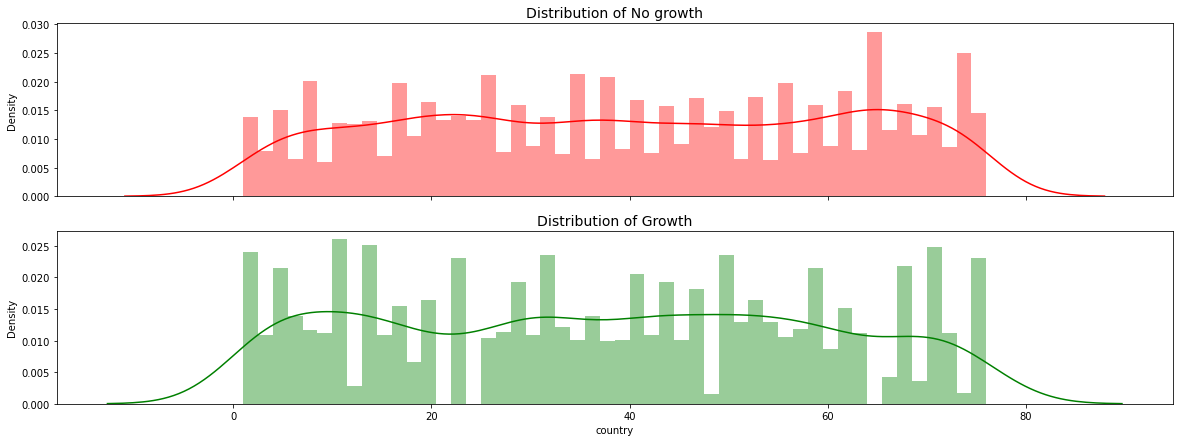

In [ ]:
# Slicing data with No-Attrition
Target_No = df['country'][df['Target'] == 0]

# Slicing data with Yes-Attrition
Target_Yes = df['country'][df['Target'] == 1]

# Plotting the distribution of the sliced data
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1, sharex = True, figsize = (20, 7))
sns.distplot(a = Target_No, bins = 50, ax = ax1, color = 'red')
ax1.set_title(label = 'Distribution of No growth' , size = 14)
ax1.set_xlabel(xlabel = '')
sns.distplot(a = Target_Yes, bins = 50, ax = ax2, color = 'green')
ax2.set_title(label = 'Distribution of Growth', size = 14)
plt.show()

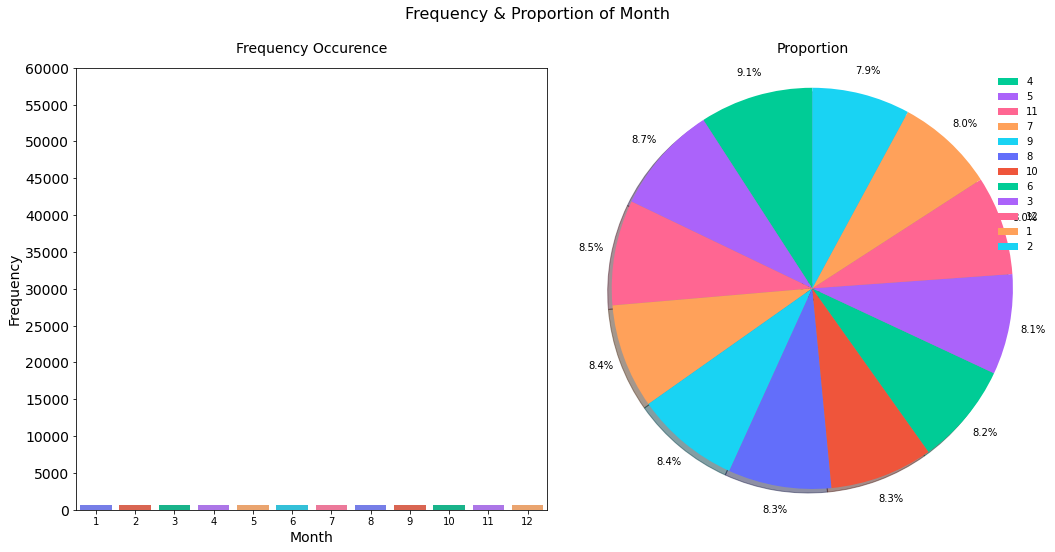

In [ ]:
# Creating Figure Instance
figure = plt.figure(figsize = [15, 7.25])

colors_list1 = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692']
colors_list2 = ['#00CC96', '#AB63FA', '#FF6692', '#FFA15A', '#19D3F3', '#636EFA', '#EF553B']

# Plotting Plot 1 i.e. Bar Plot
plt.subplot(1, 2, 1)
sns.barplot(x = df['month'].value_counts().index, y = df['month'].value_counts(), palette  = colors_list1)
plt.yticks(range(0, 65000, 5000), size = 14)
plt.xlabel('Month', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency Occurence', y=1.02, size = 14)


plt.subplot(1, 2, 2)
df['month'].value_counts().plot(kind = 'pie', figsize = [15, 7.25], autopct = '%1.1f%%', startangle = 90, 
                                     shadow = True, labels = None, pctdistance = 1.12, colors = colors_list2)
plt.title('Proportion', y = 1.02, size = 14)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = df['month'].value_counts().index, loc = 'upper right', frameon = False)
plt.suptitle(t = 'Frequency & Proportion of Month', y = 1.05, size = 16)
plt.tight_layout(pad = 1.0)
plt.show()

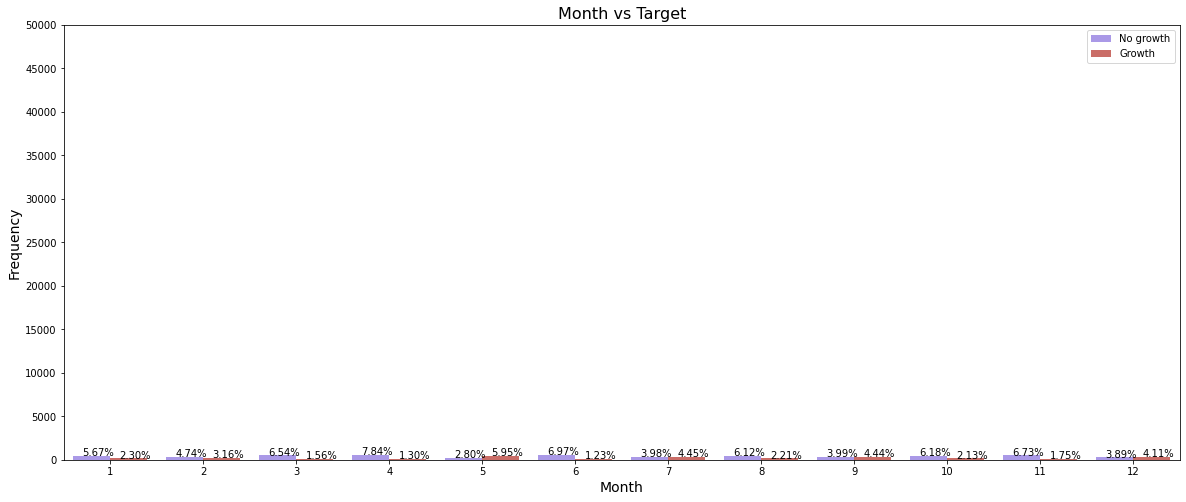

In [ ]:
figure = plt.figure(figsize = [20, 8])

ax = sns.countplot(x = 'month',  data = df, hue = 'Target', palette = ['#A38CF4', '#DB5E56', '#56D3DB', '#56DB7F'])

total = df.shape[0]

for p in ax.patches:
  percentage = '{:.2f}%'.format(100*p.get_height() / total)
  x = p.get_x() + p.get_width() / 4
  y = p.get_y() + p.get_height()
  ax.annotate(s = percentage, xy = (x, y))

plt.yticks(range(0, 55000, 5000))
plt.xlabel('Month', size = 14)
plt.ylabel('Frequency', size = 14)
plt.legend(labels = ['No growth', 'Growth'], loc = 'upper right')
plt.title('Month vs Target', y = 1, size = 16)
plt.show()

# Data preprocessing

In [3]:
df.drop(columns=['ID','month','country'],axis=1,inplace=True)

In [4]:
missing=['1_diffClosing stocks(kmt)','1_diffImports(kmt)','2_diffClosing stocks(kmt)','2_diffImports(kmt)','3_diffClosing stocks(kmt)','3_diffImports(kmt)','4_diffClosing stocks(kmt)','4_diffImports(kmt)','5_diffClosing stocks(kmt)','5_diffImports(kmt)','6_diffClosing stocks(kmt)','6_diffImports(kmt)','7_diffClosing stocks(kmt)','8_diffClosing stocks(kmt)','9_diffClosing stocks(kmt)','10_diffClosing stocks(kmt)','11_diffClosing stocks(kmt)','12_diffClosing stocks(kmt)','7_diffImports(kmt)','8_diffImports(kmt)','9_diffImports(kmt)','10_diffImports(kmt)','11_diffImports(kmt)','12_diffImports(kmt)']

In [5]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()
df[(missing)]=imputer.fit_transform(df[(missing)])

In [6]:
X = df.drop(['Target'], axis=1)
y = df['Target']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Model selection and training original data



In [8]:
log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1,solver='liblinear')
sv_clf = SVC(random_state=0, probability=True, class_weight='balanced',kernel='rbf')
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rf_clf= RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=7227, verbose=0, warm_start=False)
gb_clf= GradientBoostingClassifier(random_state=0)
xgb_clf=XGBClassifier(random_state=0)
lgbm_clf=LGBMClassifier(random_state=0)
cat_clf=CatBoostClassifier(random_state=0)

In [9]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, knn_clf,rf_clf,gb_clf,xgb_clf,lgbm_clf,cat_clf]

# Create an empty list to append scores and classifier name
train_score = []
test_score = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_score.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_score.append(np.round(a=clf.score(X_test,y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Learning rate set to 0.021684
0:	learn: 0.6869297	total: 78.6ms	remaining: 1m 18s
1:	learn: 0.6813838	total: 103ms	remaining: 51.5s
2:	learn: 0.6760098	total: 128ms	remaining: 42.4s
3:	learn: 0.6707871	total: 152ms	remaining: 37.9s
4:	learn: 0.6657412	total: 176ms	remaining: 35.1s
5:	learn: 0.6608409	total: 217ms	remaining: 36s
6:	learn: 0.6562599	total: 241ms	remaining: 34.3s
7:	learn: 0.6514490	total: 266ms	remaining: 33s
8:	learn: 0.6468956	total: 292ms	remaining: 32.1s
9:	learn: 0.6425844	total: 318ms	remaining: 31.5s
10:	learn: 0.6386802	total: 343ms	remaining: 30.9s
11:	learn: 0.6347593	total: 380ms	remaining: 31.3s
12:	learn: 0.6311485	total: 404ms	remaining: 30.7s
13:	learn: 0.6273814	total: 434ms	remaining: 30.6s
14:	learn: 0.6238495	total: 458ms	remaining: 30.1s
15:	learn: 0.6205414	total: 483ms	remaining: 29.7s
16:	learn: 0.6170680	total: 507ms	remaining: 29.3s
17:	learn: 0.6139851	total: 531ms	remaining: 29s
18:	learn: 0.6108079	total: 555ms	remaining: 28.6s
19:	learn: 0.60

In [10]:
# Create a recall dataframe from recall and names list
score_frame = pd.DataFrame(data={'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier
Train Score,0.68,0.68,1.00,0.76,0.90,0.79,0.79,0.94,0.91
Test score,0.68,0.70,0.67,0.70,0.77,0.77,0.77,0.76,0.76


# Model training (dimensionality reduction)

In [18]:
# Performing LDA Transformation
lda = LinearDiscriminantAnalysis()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

In [19]:
# Initialize classifiers
log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1,solver='liblinear')
sv_clf = SVC(random_state=0, probability=True, class_weight='balanced')
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rf_clf= RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=7227, verbose=0, warm_start=False)
gb_clf= GradientBoostingClassifier(random_state=0)
xgb_clf=XGBClassifier(random_state=0)
lgbm_clf=LGBMClassifier(random_state=0)
cat_clf=CatBoostClassifier(random_state=0)

In [20]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, knn_clf,rf_clf,gb_clf,xgb_clf,lgbm_clf,cat_clf]

# Create an empty list to append scores and classifier name
train_score = []
test_score = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train_lda, y_train)

  # Append train and test score to the empty list
  train_score.append(np.round(a=clf.score(X_train_lda, y_train), decimals=2))
  test_score.append(np.round(a=clf.score(X_test_lda,y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Learning rate set to 0.021684
0:	learn: 0.6876914	total: 2.08ms	remaining: 2.08s
1:	learn: 0.6823875	total: 4.08ms	remaining: 2.03s
2:	learn: 0.6773047	total: 6.25ms	remaining: 2.08s
3:	learn: 0.6723796	total: 8.38ms	remaining: 2.09s
4:	learn: 0.6676829	total: 10.5ms	remaining: 2.09s
5:	learn: 0.6631086	total: 12.7ms	remaining: 2.1s
6:	learn: 0.6588968	total: 14.8ms	remaining: 2.09s
7:	learn: 0.6550211	total: 16.8ms	remaining: 2.09s
8:	learn: 0.6512009	total: 19ms	remaining: 2.09s
9:	learn: 0.6475729	total: 21.1ms	remaining: 2.09s
10:	learn: 0.6440511	total: 23.2ms	remaining: 2.09s
11:	learn: 0.6407518	total: 25.3ms	remaining: 2.08s
12:	learn: 0.6375095	total: 27.4ms	remaining: 2.08s
13:	learn: 0.6344710	total: 29.4ms	remaining: 2.07s
14:	learn: 0.6316645	total: 31.5ms	remaining: 2.07s
15:	learn: 0.6287426	total: 33.6ms	remaining: 2.07s
16:	learn: 0.6260570	total: 35.8ms	remaining: 2.07s
17:	learn: 0.6235820	total: 37.8ms	remaining: 2.06s
18:	learn: 0.6211058	total: 39.9ms	remaining: 2

In [21]:
# Create a recall dataframe from recall and names list
score_frame = pd.DataFrame(data={'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier,XGBClassifier,LGBMClassifier,CatBoostClassifier
Train Score,0.68,0.69,1.00,0.77,0.70,0.73,0.73,0.73,0.72
Test score,0.69,0.70,0.63,0.68,0.68,0.71,0.71,0.72,0.72


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.95, random_state=0).fit(X)

In [ ]:
var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3) * 100)

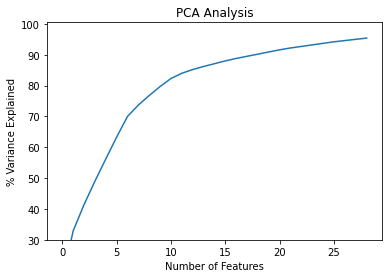

In [ ]:
plt.plot(var)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Analysis')
plt.ylim(30, 100.5)
plt.style.context('seaborn-whitegrid')

In [ ]:
print('%d components explain 95%% of the variation in data' % pca.n_components_)

29 components explain 95% of the variation in data


In [ ]:
pca = PCA(n_components=29, random_state=0)
pca.fit(X)

X = pca.transform(X)
print(X.shape)

(7619, 29)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [ ]:
log_clf = LogisticRegression(random_state=0, class_weight='balanced', n_jobs=-1,solver='liblinear')
sv_clf = SVC(random_state=0, probability=True, class_weight='balanced')
dt_clf = DecisionTreeClassifier(random_state=0, class_weight='balanced')
knn_clf = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
rf_clf= RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=7227, verbose=0, warm_start=False)
gb_clf= GradientBoostingClassifier(random_state=0)

In [ ]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, knn_clf,rf_clf,gb_clf]

# Create an empty list to append scores and classifier name
train_score = []
test_score = []
clf_names = []

# Train classifier over train data and append scores to empty list
for clf in clf_list:
  # Fit the train data over the classifier object
  clf.fit(X_train, y_train)

  # Append train and test score to the empty list
  train_score.append(np.round(a=clf.score(X_train, y_train), decimals=2))
  test_score.append(np.round(a=clf.score(X_test,y_test), decimals=2))
  clf_names.append(clf.__class__.__name__)

print('Success!')

Success!
CPU times: user 30.6 s, sys: 200 ms, total: 30.8 s
Wall time: 25.5 s


In [ ]:
# Create a recall dataframe from recall and names list
score_frame = pd.DataFrame(data={'Train Score': train_score, 'Test score': test_score}, index=clf_names)

# View the recall of all the classifiers
score_frame.transpose()

,LogisticRegression,SVC,DecisionTreeClassifier,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier
Train Score,0.67,0.67,1.00,0.76,0.79,0.75
Test score,0.70,0.70,0.63,0.68,0.70,0.71


In [12]:
# classify function
from sklearn.model_selection import cross_val_score
def classify(model, X, y):
    model.fit(X_train, y_train)
    print("Accuracy is", model.score(X_test, y_test)*100)
    # cross validation - it is used for better validation of model
    # eg: cv-5, train-4, test-1
    score = cross_val_score(model, X, y, cv=5,scoring='f1')
    print("Cross validation is",np.mean(score)*100)
    

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
classify(model, X, y)

Accuracy is 76.7979002624672
Cross validation is 57.90799783580772


# Model training-Tuned Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=7227, verbose=0, warm_start=False)
classify(model, X, y)

Accuracy is 77.16535433070865
Cross validation is 60.673175700608375


In [13]:
model=XGBClassifier(random_state=0)
classify(model, X, y)

Accuracy is 76.74540682414698
Cross validation is 56.21943633848267


In [14]:
model=LGBMClassifier(random_state=0)
classify(model, X, y)

Accuracy is 75.38057742782152
Cross validation is 57.08281659232771


In [15]:
model=CatBoostClassifier(random_state=0)
classify(model, X, y)

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6573065	total: 175ms	remaining: 29.1s
6:	learn: 0.6520437	total: 201ms	remaining: 28.5s
7:	learn: 0.6472065	total: 229ms	remaining: 28.4s
8:	learn: 0.6425130	total: 259ms	remaining: 28.5s
9:	learn: 0.6380888	total: 283ms	remaining: 28.1s
10:	learn: 0.6339927	total: 308ms	remaining: 27.7s
11:	learn: 0.6298809	total: 335ms	remaining: 27.6s
12:	learn: 0.6256843	total: 359ms	remaining: 27.3s
13:	learn: 0.6220681	total: 386ms	remaining: 27.2s
14:	learn: 0.6180760	total: 410ms	remaining: 26.9s
15:	learn: 0.6139942	total: 435ms	remaining: 26.7s
16:	learn: 0.6104333	total: 464ms	remaining: 26.8s
17:	learn: 0.6073885	total: 490ms	remaining: 26.7s
18:	learn: 0.6043202	total: 516ms	remaining: 26.7s
19:	learn: 0.6013815	total: 541ms	remaining: 26.5s
20:	learn: 0.5986462	total: 568ms	remaining: 26.5s
21:	learn: 0.5956233	total: 595ms	remaining: 26.4s
22:	learn: 0.5931770	total: 620ms	remaining: 26.3s
23:	learn: 0.5906818	total: 645ms	re

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = df, 
          target = 'Target')

,Description,Value
0,session_id,7227
1,Target,Target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(7619, 123)"
5,Missing Values,True
6,Numeric Features,121
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.75,0.77,0.48,0.69,0.57,0.40,0.41,2.33
gbc,Gradient Boosting Classifier,0.75,0.78,0.46,0.70,0.56,0.39,0.41,7.20
lightgbm,Light Gradient Boosting Machine,0.75,0.78,0.50,0.68,0.57,0.40,0.41,1.36
ada,Ada Boost Classifier,0.74,0.75,0.49,0.66,0.56,0.38,0.39,1.43
et,Extra Trees Classifier,0.73,0.73,0.46,0.65,0.54,0.35,0.36,1.30
ridge,Ridge Classifier,0.71,0.00,0.42,0.61,0.50,0.31,0.32,0.04
lda,Linear Discriminant Analysis,0.71,0.70,0.44,0.61,0.51,0.31,0.32,0.17
lr,Logistic Regression,0.71,0.70,0.45,0.60,0.51,0.31,0.32,1.39
knn,K Neighbors Classifier,0.68,0.62,0.24,0.60,0.34,0.18,0.21,0.19
nb,Naive Bayes,0.67,0.67,0.23,0.54,0.32,0.14,0.17,0.04


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=7227, verbose=0,
                       warm_start=False)

In [ ]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.74,0.76,0.46,0.68,0.55,0.37,0.39
1,0.76,0.79,0.53,0.69,0.60,0.43,0.44
2,0.73,0.75,0.42,0.66,0.51,0.34,0.35
3,0.73,0.74,0.48,0.64,0.55,0.36,0.37
4,0.76,0.78,0.46,0.74,0.57,0.41,0.44
5,0.75,0.78,0.48,0.71,0.57,0.41,0.42
6,0.74,0.75,0.44,0.68,0.54,0.36,0.38
7,0.74,0.78,0.48,0.68,0.56,0.39,0.40
8,0.77,0.80,0.57,0.72,0.63,0.47,0.48
9,0.75,0.77,0.48,0.70,0.57,0.40,0.41


In [ ]:
predictions = predict_model(rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.75,0.78,0.50,0.69,0.58,0.41,0.42


In [ ]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
tuned_rf= tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.75,0.75,0.54,0.66,0.60,0.42,0.42
1,0.77,0.79,0.61,0.68,0.64,0.47,0.47
2,0.73,0.75,0.49,0.64,0.56,0.37,0.37
3,0.73,0.74,0.56,0.61,0.58,0.38,0.38
4,0.76,0.76,0.52,0.70,0.60,0.43,0.44
5,0.75,0.76,0.55,0.68,0.60,0.43,0.43
6,0.74,0.75,0.52,0.64,0.57,0.39,0.39
7,0.73,0.77,0.56,0.62,0.59,0.39,0.39
8,0.78,0.82,0.66,0.69,0.68,0.51,0.51
9,0.75,0.78,0.59,0.65,0.62,0.43,0.44


In [ ]:
tuned_rf

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0001,
                       min_impurity_split=None, min_samples_leaf=2,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=150, n_jobs=-1, oob_score=False,
                       random_state=7227, verbose=0, warm_start=False)

In [ ]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predictions = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.75,0.78,0.59,0.66,0.62,0.43,0.43


# Test set prediction

In [ ]:
test=pd.read_csv('Oil_test.csv')

In [ ]:
test_copy=test.copy()

In [ ]:
test.isnull().sum()

ID                                 0
month                              0
country                            0
1_diffClosing stocks(kmt)         63
1_diffExports(kmt)                 0
1_diffImports(kmt)                37
1_diffRefinery intake(kmt)         0
1_diffWTI                          0
1_diffSumClosing stocks(kmt)       0
1_diffSumExports(kmt)              0
1_diffSumImports(kmt)              0
1_diffSumProduction(kmt)           0
1_diffSumRefinery intake(kmt)      0
2_diffClosing stocks(kmt)         61
2_diffExports(kmt)                 0
2_diffImports(kmt)                37
2_diffRefinery intake(kmt)         0
2_diffWTI                          0
2_diffSumClosing stocks(kmt)       0
2_diffSumExports(kmt)              0
2_diffSumImports(kmt)              0
2_diffSumProduction(kmt)           0
2_diffSumRefinery intake(kmt)      0
3_diffClosing stocks(kmt)         61
3_diffExports(kmt)                 0
3_diffImports(kmt)                36
3_diffRefinery intake(kmt)         0
3

In [ ]:
test.drop(columns=['ID','month','country'],inplace=True)

In [ ]:
test[(missing)]=imputer.transform(test[(missing)])

In [ ]:
test= sc.transform(test)

In [ ]:
pred_y=model.predict(test)

In [ ]:
submission = pd.DataFrame({'ID':test_copy['ID'],'Target':pred_y})

In [ ]:
submission.to_csv('submission.csv',header=False,index=False)

In [ ]:
submission.head()

,ID,Target
0,ID03667,1
1,ID06089,1
2,ID03095,0
3,ID02233,1
4,ID03119,0
